In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from datetime import datetime 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_excel(r"C:\Users\LENOVO\Downloads\DS\august\29th\SVM\project\default of credit card clients.xls")

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
print("Default Credit Card Clients data -  rows:",data.shape[0]," columns:", data.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [10]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
temp = data['default payment next month'].value_counts()
temp

0    23364
1     6636
Name: default payment next month, dtype: int64

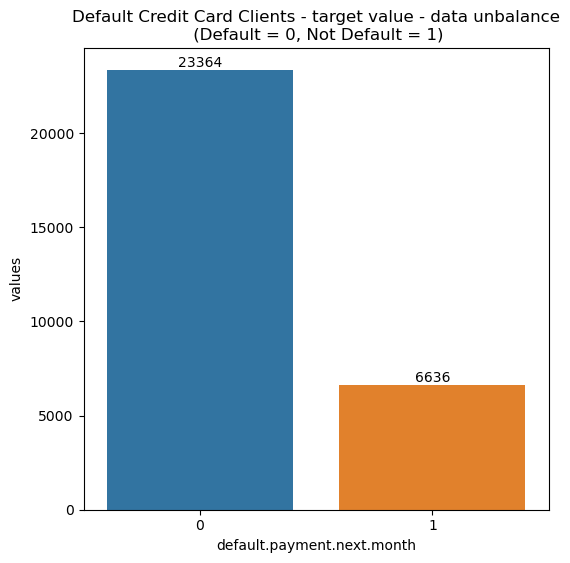

''

In [13]:
temp = data['default payment next month'].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
ay=sns.barplot(x = 'default.payment.next.month', y="values", data=df)
for i in ay.containers:
    ay.bar_label(i,)
locs, labels = plt.xticks()
plt.show()
''''''
#The code snippet you provided seems to be written in Python using libraries like pandas, matplotlib, and seaborn. It appears to be used for data visualization, specifically for visualizing the distribution of a categorical variable "default.payment.next.month" in a DataFrame named "data_df."

#Here's a breakdown of what each part of the code does:

#1. `temp = data_df["default.payment.next.month"].value_counts()`: This line calculates the count of unique values in the column "default.payment.next.month" of the DataFrame "data_df." This is likely used to determine the distribution of default and non-default cases in the dataset.

#2. `df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})`: This line creates a new DataFrame "df" using the counts obtained in the previous step. It has two columns: "default.payment.next.month" which contains the unique values from the index of the "temp" Series (likely 0 and 1) and "values" which contains the corresponding counts.

#3. `plt.figure(figsize=(6,6))`: This line sets the figure size of the upcoming plot to 6x6 inches.

#4. `plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')`: This line sets the title of the plot.

#5. `sns.set_color_codes("pastel")`: This sets the color palette for the plot.

#6. `sns.barplot(x='default.payment.next.month', y="values", data=df)`: This line creates a bar plot using Seaborn's `barplot` function. It visualizes the distribution of counts of default and non-default cases using the "default.payment.next.month" column on the x-axis and the corresponding counts on the y-axis.

#7. `locs, labels = plt.xticks()`: This line gets the x-axis tick locations and labels.

#8. `plt.show()`: This line displays the plot.

#This code essentially generates a bar plot to visualize the distribution of default and non-default cases in the dataset. The x-axis represents the categories (0 for default, 1 for not default), and the y-axis represents the counts of each category. The code uses the Seaborn library to create the plot and pandas for data manipulation.''''''

###***A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).***

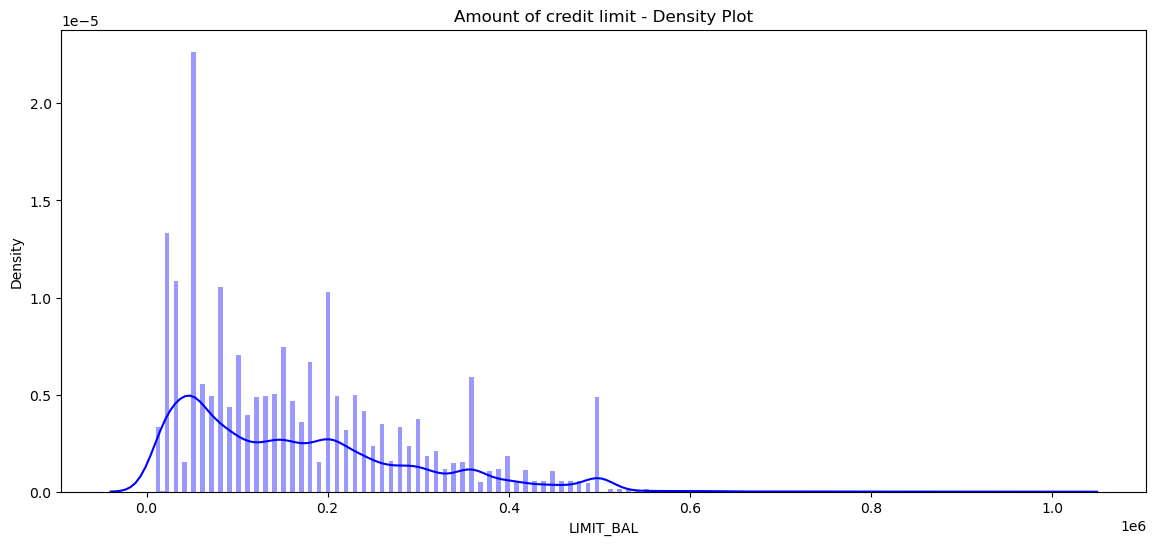

In [14]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['LIMIT_BAL'],kde=True,bins=200, color="blue")

plt.show()
#The code snippet you provided is another example of data visualization using Python's libraries, particularly matplotlib and seaborn. This code creates a density plot to visualize the distribution of credit limits in a dataset.

#ere's a breakdown of the code:

#1. `plt.figure(figsize=(14, 6))`: This line sets the size of the figure for the plot. 
    #The figure size is 14 inches in width and 6 inches in height.

#2. `plt.title('Amount of credit limit - Density Plot')`: This line sets the title of the plot.

#3. `sns.set_color_codes("pastel")`: This sets the color palette for the plot.

#4. `sns.distplot(data['LIMIT_BAL'], kde=True, bins=200, color="blue")`: This line uses Seaborn's `distplot` function to create a density plot.
    #It visualizes the distribution of credit limits in the dataset, 
    #using the values from the 'LIMIT_BAL' column. The `kde=True` argument adds a kernel density estimate curve to the plot,
    #and `bins=200` specifies the number of bins for the histogram. The color of the plot is set to blue.

#5. `plt.show()`: This line displays the plot.



###***Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

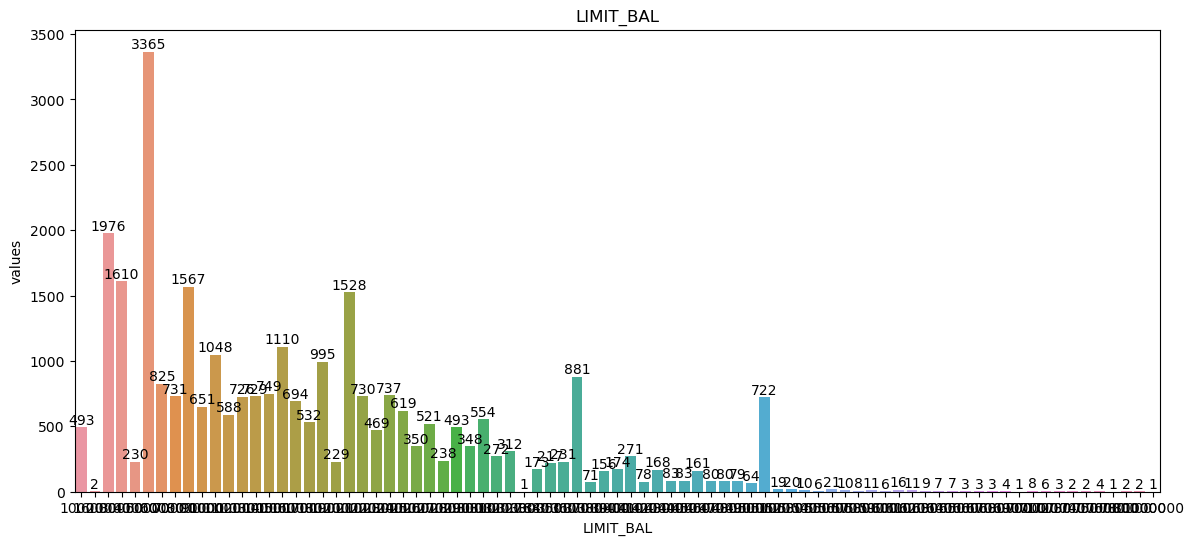

In [15]:
templ=data['LIMIT_BAL'].value_counts()
plt.figure(figsize = (14,6))
dfl=pd.DataFrame({'LIMIT_BAL':templ.index, "values":templ.values})
plt.title('LIMIT_BAL')

sns.set_color_codes('bright')
ax=sns.barplot(x='LIMIT_BAL',y='values',data=dfl,n_boot=1000)
for i in ax.containers:
    ax.bar_label(i,)
locs, labels=plt.xticks()
plt.show()


In [16]:
data=data.drop(['ID'],axis=1)

In [17]:
data.rename(columns={'default payment next month':'default'},inplace=True)

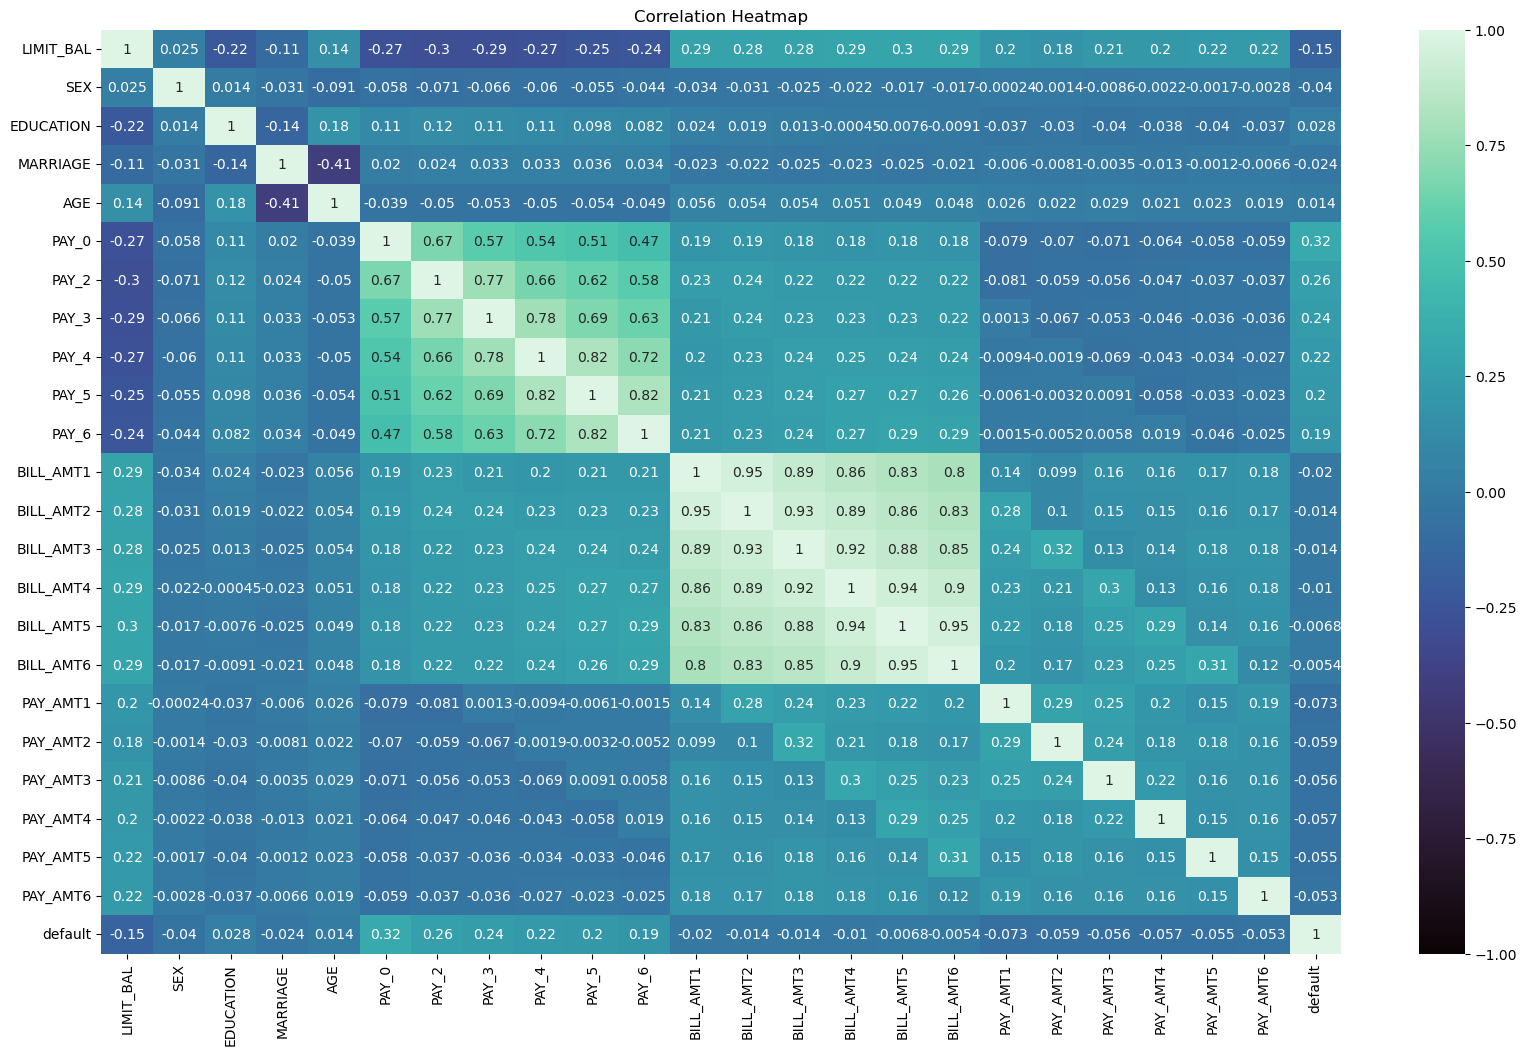

In [18]:
cor=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

###***PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6 are more correlated
      AGE and MARRIAGE are negatively correlated

In [19]:
{column: len(data[column].unique()) for column in data.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'EDUCATION': 7,
 'MARRIAGE': 4,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'default': 2}

### 
*I observe here education and marriage these ones have seven and four values respectivly they are nominal features.
*But we know it's possible that we could call this an ordinal feature because there are some sort of progression berween schooling categories but because we have these unknowns at the end it would be very difficult  and we also have others right it would be very difficlt to order them and same here we can't really order the marital status.
*Here remaining all these are already ordered 
*Here pay amounts and bill amounts are not even categorical at all they are just numerical columns these are also ordered so we don't have to worry about encoding them.
**so we really have to deal with are these two columns here EDUCATION and MARRIAGE

In [20]:
{'EDUCATION':"EDU"}.items()

dict_items([('EDUCATION', 'EDU')])

In [21]:
pd.get_dummies(data['EDUCATION'],prefix='EDU')

,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
29995,0,0,0,1,0,0,0
29996,0,0,0,1,0,0,0
29997,0,0,1,0,0,0,0
29998,0,0,0,1,0,0,0


In [22]:
pd.get_dummies(data['MARRIAGE'],prefix='MRG')

,MRG_0,MRG_1,MRG_2,MRG_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,1,0
29997,0,0,1,0
29998,0,1,0,0


In [23]:
def onehot_encoder(data,column_dict):
    data=data.copy()
    for column, prefix in column_dict.items():
        dummies=pd.get_dummies(data[column],prefix=prefix)
        data=pd.concat([data,dummies],axis=1)
        data=data.drop(column,axis=1)
    return data

In [24]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
def preprocess_inputs(data):
    data=data.copy()
    
    data=onehot_encoder(data,{'EDUCATION':'EDU',
                        'MARRIAGE':'MRG'
                       }
                      )
    
    #split data into X and y
    y=data['default'].copy()
    X=data.drop("default",axis=1).copy()
  
    return X,y
    

In [26]:
X,y=preprocess_inputs(data)

In [27]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [28]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MRG_0,MRG_1,MRG_2,MRG_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,0,0,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,1,0,0,0,0,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,0,1,0,0,0,0,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,0,1,0,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,0,0,1,0,0,0,0,1,0,0
29996,150000,1,43,-1,-1,-1,-1,0,0,1683,...,0,0,1,0,0,0,0,0,1,0
29997,30000,1,37,4,3,2,-1,0,0,3565,...,0,1,0,0,0,0,0,0,1,0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,0,0,1,0,0,0,0,1,0,0


###

### scaling
**Scalling will give it will make sure that each column and x takes on a very     similar  range of values**
* so right now we are on totally totally different ranges this one here we can   see goes from negative values also we have
* so it's very different skills and we want standardize the columns
* most of the values in each column lie between negative one and one so we are   going to do that with standardscalar


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4607   96]
 [ 984  313]]


In [34]:
from sklearn.metrics import accuracy_score 
ac = accuracy_score(y_test, y_pred)
print(ac) 



0.82


In [35]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.82      0.98      0.90      4703
           1       0.77      0.24      0.37      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000



In [36]:
bias = classifier.score(X_train, y_train)
bias

0.8085833333333333

In [37]:
variance = classifier.score(X_test, y_test)
variance

0.82

### Support Vector Machines Classifier (SVM )

In [38]:
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 



# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred1=svc.predict(X_test)

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)

#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
bias = classifier.score(X_train,y_train)
print(bias)

variance = classifier.score(X_test,y_test)
print(variance)



Confusion matrix

 [[4527  176]
 [ 874  423]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.71      0.33      0.45      1297

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.67      6000
weighted avg       0.81      0.82      0.80      6000

Model accuracy score with default hyperparameters: 0.8250
0.8085833333333333
0.82


### k-nearest_neighbors(KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNn=KNeighborsClassifier()
KNn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred2=KNn.predict(X_test)

In [41]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade scikit-learn threadpoolctl


In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

# This is to get the Models Accuracy 
from sklearn.metrics import accuracy_score 
ac = accuracy_score(y_test, y_pred2)
print(ac) 


# This is to get the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred2)
print(cr)

bias = classifier.score(X_train,y_train)
print(bias)

variance = classifier.score(X_test,y_test)
print(variance)


[[4296  407]
 [ 854  443]]
0.7898333333333334
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4703
           1       0.52      0.34      0.41      1297

    accuracy                           0.79      6000
   macro avg       0.68      0.63      0.64      6000
weighted avg       0.77      0.79      0.77      6000

0.8085833333333333
0.82
